<a href="https://colab.research.google.com/github/jeyashalin/codelearnhub/blob/main/swiggy_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


from google.colab import files
uploaded = files.upload()

Saving swiggy.csv to swiggy.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('swiggy.csv')
print(df.head())

    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block             56  
2   Double Road             50  
3 

In [7]:
df.isnull().sum()

,0
ID,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
Total ratings,0
Food type,0
Address,0
Delivery time,0


In [9]:
df.dtypes

,0
ID,int64
Area,object
City,object
Restaurant,object
Price,float64
Avg ratings,float64
Total ratings,int64
Food type,object
Address,object
Delivery time,int64


In [11]:
df.columns=df.columns.str.strip().str.replace(" ","_").str.upper()
df.head()

,ID,AREA,CITY,RESTAURANT,PRICE,AVG_RATINGS,TOTAL_RATINGS,FOOD_TYPE,ADDRESS,DELIVERY_TIME
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [15]:
print(df["CITY"].unique())

['Bangalore' 'Hyderabad' 'Mumbai' 'Pune' 'Kolkata' 'Delhi' 'Chennai'
 'Ahmedabad' 'Surat']


In [20]:
print(df["FOOD_TYPE"].head(10))

0            Biryani,Chinese,North Indian,South Indian
1                                     Mughlai,Lucknowi
2                                              Chinese
3                 North Indian,Punjabi,Tandoor,Chinese
4    Rajasthani,Gujarati,North Indian,Snacks,Desser...
5                                 Mughlai,North Indian
6                             Mexican,Beverages,Salads
7                Desserts,British,Bakery,Pizzas,Snacks
8    American,Italian,Beverages,Continental,Chinese...
9                                              Bengali
Name: FOOD_TYPE, dtype: object


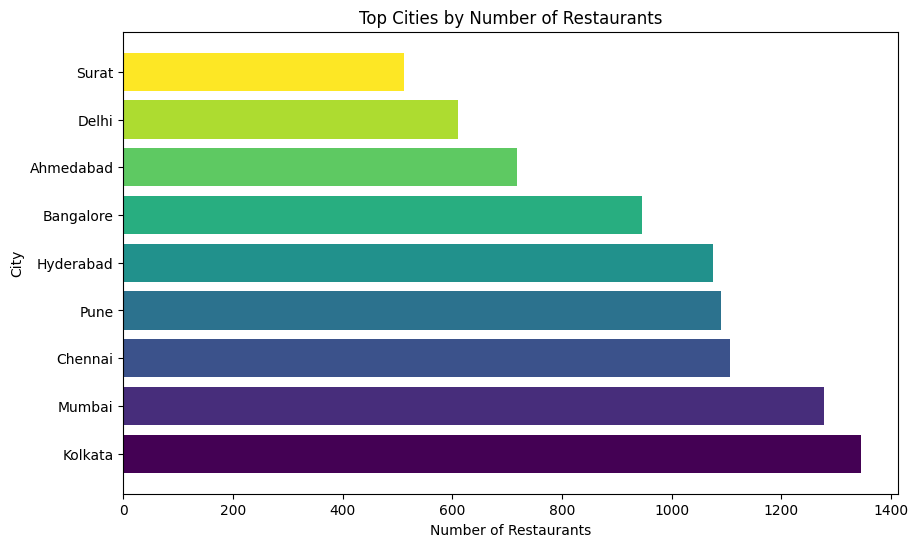

In [26]:
import matplotlib.pyplot as plt


# Count restaurants by city
city_counts = df['CITY'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(y=city_counts.index, width=city_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(city_counts))))
plt.title("Top Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

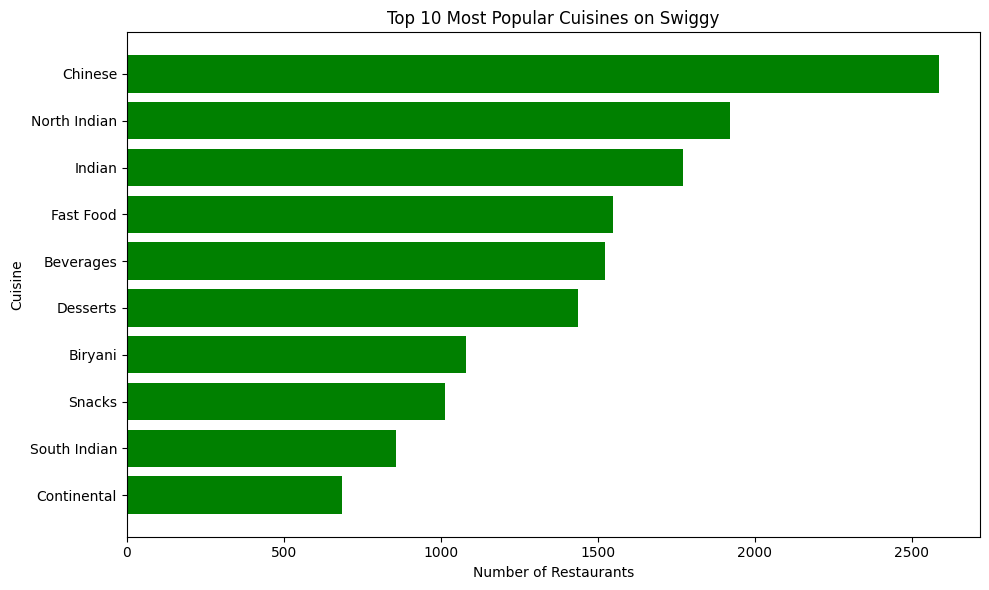

In [36]:
from collections import Counter
import matplotlib.pyplot as plt


all_cuisines = df['FOOD_TYPE'].dropna().str.split(',').sum()
all_cuisines = [c.strip() for c in all_cuisines]

cuisine_counts = Counter(all_cuisines)
top_cuisines = dict(sorted(cuisine_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10, 6))
plt.barh(list(top_cuisines.keys()), list(top_cuisines.values()), color='green')
plt.title("Top 10 Most Popular Cuisines on Swiggy")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


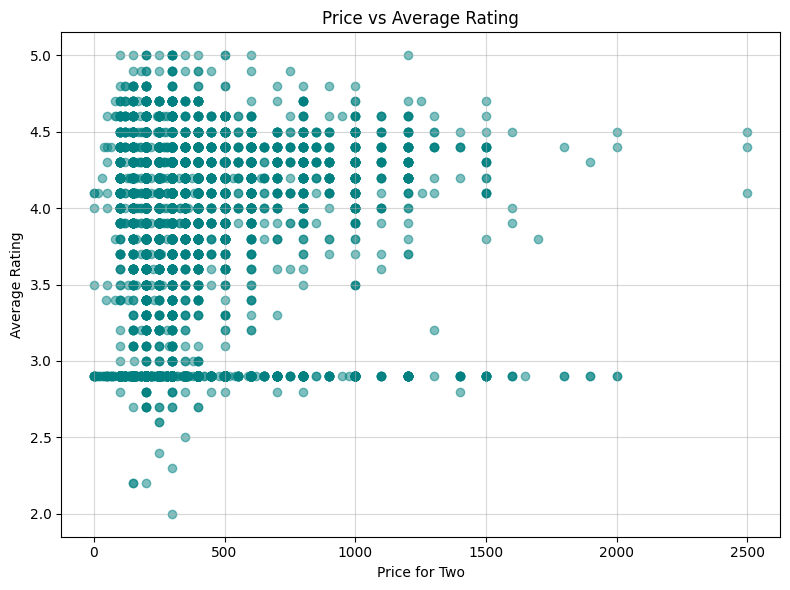

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PRICE'], df['AVG_RATINGS'], color='teal', alpha=0.5)
plt.title("Price vs Average Rating")
plt.xlabel("Price for Two")
plt.ylabel("Average Rating")
plt.grid(True,alpha=0.5)
plt.tight_layout()
plt.show()


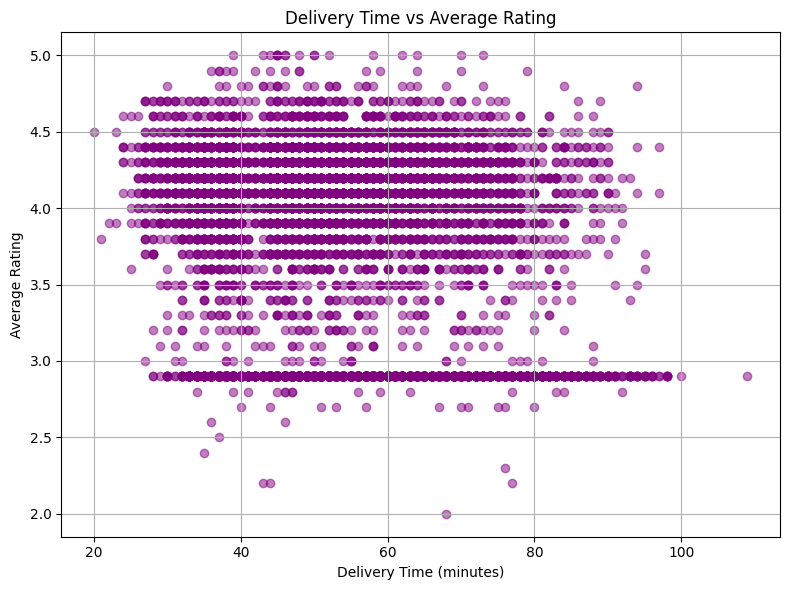

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df['DELIVERY_TIME'], df['AVG_RATINGS'], color='purple', alpha=0.5)
plt.title("Delivery Time vs Average Rating")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()
